In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from dotenv import load_dotenv
import json
import os

# Load environment variables from .env file
load_dotenv()

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': os.getenv('CMC_API_KEY'),
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-05-28T10:59:58.980Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9771}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12197, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
type(data)

dict

In [5]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12197,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987101e+07,1.987101e+07,False,NaN,1,NaN,NaN,None,2025-05-28T10:59:00.000Z,108901.520214,5.192498e+10,2.6767,0.099470,-0.748470,2.390526,14.529497,31.412383,25.261141,2.163983e+12,63.0214,2.286932e+12,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
1,1027,Ethereum,ETH,ethereum,10315,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207252e+08,1.207252e+08,True,NaN,2,NaN,NaN,None,2025-05-28T10:59:00.000Z,2641.907335,2.105357e+10,6.8287,0.564095,0.149877,4.433702,45.481594,41.457474,11.217997,3.189449e+11,9.2886,3.189449e+11,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
2,825,Tether USDt,USDT,tether,129930,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.529134e+11,1.560043e+11,True,NaN,3,NaN,NaN,None,2025-05-28T10:58:00.000Z,1.000333,7.965061e+10,7.4134,-0.007926,0.008871,0.010118,-0.004176,0.090055,0.143194,1.529643e+11,4.4548,1.560562e+11,None,2025-05-28T10:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-28 19:00:00.419889
3,52,XRP,XRP,xrp,1617,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.868601e+10,9.998611e+10,False,NaN,4,NaN,NaN,None,2025-05-28T10:59:00.000Z,2.304979,2.041030e+09,-7.1096,0.300696,-0.535628,-1.727304,-0.998708,11.010224,2.458155,1.352700e+11,3.9394,2.304979e+11,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
4,1839,BNB,BNB,bnb,2552,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408879e+08,1.408879e+08,False,NaN,5,NaN,NaN,None,2025-05-28T10:59:00.000Z,686.868792,1.936743e+09,11.7695,0.455997,0.959451,5.160582,13.310935,13.678959,11.907602,9.677151e+10,2.8183,9.677151e+10,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
5,5426,Solana,SOL,solana,926,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.204034e+08,6.016794e+08,True,NaN,6,NaN,NaN,None,2025-05-28T10:59:00.000Z,174.154146,3.555638e+09,21.6473,0.354343,-1.154225,3.545706,14.155681,38.442927,22.629408,9.063041e+10,2.6396,1.047850e+11,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
6,3408,USDC,USDC,usd-coin,28273,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.137016e+10,6.137016e+10,False,NaN,7,NaN,NaN,None,2025-05-28T10:59:00.000Z,0.999978,1.131843e+10,3.7612,0.029396,0.015065,0.015506,0.001430,0.008916,0.010847,6.136882e+10,1.7872,6.136882e+10,None,2025-05-28T10:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-28 19:00:00.419889
7,74,Dogecoin,DOGE,dogecoin,1229,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.494491e+11,1.494491e+11,True,NaN,8,NaN,NaN,None,2025-05-28T10:59:00.000Z,0.223051,1.297820e+09,10.2268,0.366897,-2.391751,-1.204170,22.844057,30.323514,5.746827,3.333484e+10,0.9708,3.333484e+10,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
8,2010,Cardano,ADA,cardano,1524,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.533451e+10,4.

In [7]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '32a008ed-66f4-4de7-83f1-b7533980f2dc',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index= True)

In [8]:
import os 
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2025-05-28T11:00:04.870Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9771}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12197, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Eileen\AppData\Local\Temp\ipykernel_25984\2779323781.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df2], ignore_index= True)


KeyboardInterrupt: 

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12197,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987101e+07,1.987101e+07,False,NaN,1,NaN,NaN,None,2025-05-28T10:59:00.000Z,108901.520214,5.192498e+10,2.6767,0.099470,-0.748470,2.390526,14.529497,31.412383,25.261141,2.163983e+12,63.0214,2.286932e+12,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
1,1027,Ethereum,ETH,ethereum,10315,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207252e+08,1.207252e+08,True,NaN,2,NaN,NaN,None,2025-05-28T10:59:00.000Z,2641.907335,2.105357e+10,6.8287,0.564095,0.149877,4.433702,45.481594,41.457474,11.217997,3.189449e+11,9.2886,3.189449e+11,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
2,825,Tether USDt,USDT,tether,129930,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.529134e+11,1.560043e+11,True,NaN,3,NaN,NaN,None,2025-05-28T10:58:00.000Z,1.000333,7.965061e+10,7.4134,-0.007926,0.008871,0.010118,-0.004176,0.090055,0.143194,1.529643e+11,4.4548,1.560562e+11,None,2025-05-28T10:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-28 19:00:00.419889
3,52,XRP,XRP,xrp,1617,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.868601e+10,9.998611e+10,False,NaN,4,NaN,NaN,None,2025-05-28T10:59:00.000Z,2.304979,2.041030e+09,-7.1096,0.300696,-0.535628,-1.727304,-0.998708,11.010224,2.458155,1.352700e+11,3.9394,2.304979e+11,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
4,1839,BNB,BNB,bnb,2552,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408879e+08,1.408879e+08,False,NaN,5,NaN,NaN,None,2025-05-28T10:59:00.000Z,686.868792,1.936743e+09,11.7695,0.455997,0.959451,5.160582,13.310935,13.678959,11.907602,9.677151e+10,2.8183,9.677151e+10,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
5,5426,Solana,SOL,solana,926,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.204034e+08,6.016794e+08,True,NaN,6,NaN,NaN,None,2025-05-28T10:59:00.000Z,174.154146,3.555638e+09,21.6473,0.354343,-1.154225,3.545706,14.155681,38.442927,22.629408,9.063041e+10,2.6396,1.047850e+11,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
6,3408,USDC,USDC,usd-coin,28273,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.137016e+10,6.137016e+10,False,NaN,7,NaN,NaN,None,2025-05-28T10:59:00.000Z,0.999978,1.131843e+10,3.7612,0.029396,0.015065,0.015506,0.001430,0.008916,0.010847,6.136882e+10,1.7872,6.136882e+10,None,2025-05-28T10:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-28 19:00:00.419889
7,74,Dogecoin,DOGE,dogecoin,1229,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.494491e+11,1.494491e+11,True,NaN,8,NaN,NaN,None,2025-05-28T10:59:00.000Z,0.223051,1.297820e+09,10.2268,0.366897,-2.391751,-1.204170,22.844057,30.323514,5.746827,3.333484e+10,0.9708,3.333484e+10,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
8,2010,Cardano,ADA,cardano,1524,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.533451e+10,4.

In [10]:
# Change the scientific notification to float number
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12197,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19871009.00000,19871009.00000,False,NaN,1,NaN,NaN,None,2025-05-28T10:59:00.000Z,108901.52021,51924982775.45871,2.67670,0.09947,-0.74847,2.39053,14.52950,31.41238,25.26114,2163983088281.95239,63.02140,2286931924489.64014,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
1,1027,Ethereum,ETH,ethereum,10315,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120725247.07261,120725247.07261,True,NaN,2,NaN,NaN,None,2025-05-28T10:59:00.000Z,2641.90734,21053572061.07502,6.82870,0.56409,0.14988,4.43370,45.48159,41.45747,11.21800,318944915813.19916,9.28860,318944915813.20001,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
2,825,Tether USDt,USDT,tether,129930,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,152913418919.93286,156004270711.01822,True,NaN,3,NaN,NaN,None,2025-05-28T10:58:00.000Z,1.00033,79650610764.67908,7.41340,-0.00793,0.00887,0.01012,-0.00418,0.09006,0.14319,152964325574.72360,4.45480,156056206346.29999,None,2025-05-28T10:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-28 19:00:00.419889
3,52,XRP,XRP,xrp,1617,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58686007292.00000,99986107098.00000,False,NaN,4,NaN,NaN,None,2025-05-28T10:59:00.000Z,2.30498,2041029665.61192,-7.10960,0.30070,-0.53563,-1.72730,-0.99871,11.01022,2.45816,135269985944.57484,3.93940,230497851509.17001,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
4,1839,BNB,BNB,bnb,2552,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140887913.43000,140887913.43000,False,NaN,5,NaN,NaN,None,2025-05-28T10:59:00.000Z,686.86879,1936743385.40149,11.76950,0.45600,0.95945,5.16058,13.31093,13.67896,11.90760,96771510933.54675,2.81830,96771510933.55000,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
5,5426,Solana,SOL,solana,926,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,520403402.81302,601679431.65862,True,NaN,6,NaN,NaN,None,2025-05-28T10:59:00.000Z,174.15415,3555637858.34503,21.64730,0.35434,-1.15423,3.54571,14.15568,38.44293,22.62941,90630410256.37749,2.63960,104784967660.25000,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:00:00.419889
6,3408,USDC,USDC,usd-coin,28273,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61370161388.81693,61370161388.81693,False,NaN,7,NaN,NaN,None,2025-05-28T10:59:00.000Z,0.99998,11318434468.98968,3.76120,0.02940,0.01506,0.01551,0.00143,0.00892,0.01085,61368816278.38817,1.78720,61368816278.39000,None,2025-05-28T10:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-28 19:00:00.419889
7,74,Dogecoin,DOGE,dogecoin,1229,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,149449126383.70523,149449126383.70523,True,NaN,8,NaN,NaN,None,2025-05-28T10:59:00.000Z,0.22305,1297820057.20647,10.22680,0.36690,-2.39175,-1.20417,22.84406,30.32351,5.74683,33334840043.79244,0.97080,33334840043.79000,None,2025-05-28T10:59:00.000Z,NaN,NaN,NaN,NaN

In [12]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean(numeric_only=True)
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08214,-0.74792,2.39608,14.53171,31.40384,25.31140
Ethereum,0.56802,0.15021,4.40993,45.54016,41.42742,11.26584
Tether USDt,0.00013,0.01296,0.01229,0.00219,0.08524,0.12167
XRP,0.30901,-0.53415,-1.72242,-1.00609,11.07048,2.39219
BNB,0.45196,0.95046,5.15062,13.30278,13.66091,11.86031
Solana,0.35737,-1.15639,3.53566,14.15742,38.41767,22.58029
USDC,0.01728,0.01116,0.01022,-0.00274,-0.00177,0.00236
Dogecoin,0.38959,-2.39245,-1.19855,22.86082,30.39111,5.69747
Cardano,0.79816,-1.51245,0.18886,5.06746,12.78607,11.99451


In [13]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.08214
             quote.USD.percent_change_24h    -0.74792
             quote.USD.percent_change_7d      2.39608
             quote.USD.percent_change_30d    14.53171
             quote.USD.percent_change_60d    31.40384
             quote.USD.percent_change_90d    25.31140
Ethereum     quote.USD.percent_change_1h      0.56802
             quote.USD.percent_change_24h     0.15021
             quote.USD.percent_change_7d      4.40993
             quote.USD.percent_change_30d    45.54016
             quote.USD.percent_change_60d    41.42742
             quote.USD.percent_change_90d    11.26584
Tether USDt  quote.USD.percent_change_1h      0.00013
             quote.USD.percent_change_24h     0.01296
             quote.USD.percent_change_7d      0.01229
             quote.USD.percent_change_30d     0.00219
             quote.USD.percent_change_60d     0.08524
             quote.USD.percent_change_90

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.08214
            quote.USD.percent_change_24h  -0.74792
            quote.USD.percent_change_7d    2.39608
            quote.USD.percent_change_30d  14.53171
            quote.USD.percent_change_60d  31.40384
            quote.USD.percent_change_90d  25.31140
Ethereum    quote.USD.percent_change_1h    0.56802
            quote.USD.percent_change_24h   0.15021
            quote.USD.percent_change_7d    4.40993
            quote.USD.percent_change_30d  45.54016
            quote.USD.percent_change_60d  41.42742
            quote.USD.percent_change_90d  11.26584
Tether USDt quote.USD.percent_change_1h    0.00013
            quote.USD.percent_change_24h   0.01296
            quote.USD.percent_change_7d    0.01229
            quote.USD.percent_change_30d   0.00219
            quote.USD.percent_change_60d   0.08524
            quote.USD.percent_change_90d   0.12167
XRP         quote.USD.percent_change_1h    0.30901
            quote.USD.percent_change_24h  -0.53415
            quote.USD.percent_change_7d   -1.72242
            quote.USD.percent_change_30d  -1.00609
            quote.USD.percent_change_60d  11.07048
            quote.USD.percent_change_90d   2.39219
BNB         quote.USD.percent_change_1h    0.45196
            quote.USD.percent_change_24h   0.95046
            quote.USD.percent_change_7d    5.15062
            quote.USD.percent_change_30d  13.30278
            quote.USD.percent_change_60d  13.66091
            quote.USD.percent_change_90d  11.86031
Solana      quote.USD.percent_change_1h    0.35737
            quote.USD.percent_change_24h  -1.15639
            quote.USD.percent_change_7d    3.53566
            quote.USD.percent_change_30d  14.15742
            quote.USD.percent_change_60d  38.41767
            quote.USD.percent_change_90d  22.58029
USDC        quote.USD.percent_change_1h    0.01728
            quote.USD.percent_change_24h   0.01116
            quote.USD.percent_change_7d    0.01022
            quote.USD.percent_change_30d  -0.00274
            quote.USD.percent_change_60d  -0.00177
            quote.USD.percent_change_90d   0.00236
Dogecoin    quote.USD.percent_change_1h    0.38959
            quote.USD.percent_change_24h  -2.39245
            quote.USD.percent_change_7d   -1.19855
            quote.USD.percent_change_30d  22.86082
            quote.USD.percent_change_60d  30.39111
            quote.USD.percent_change_90d   5.69747
Cardano     quote.USD.percent_change_1h    0.79816
            quote.USD.percent_change_24h  -1.51245
            quote.USD.percent_change_7d    0.18886
            quote.USD.percent_change_30d   5.06746
            quote.USD.percent_change_60d  12.78607
            quote.USD.percent_change_90d  11.99451
TRON        quote.USD.percent_change_1h   -0.06925
            quote.USD.percent_change_24h  -0.58576
            quote.USD.percent_change_7d    1.54195
            quote.USD.percent_change_30d  11.72749
            quote.USD.percent_change_60d  17.69969
            quote.USD.percent_change_90d  20.30391
Sui         quote.USD.percent_change_1h    0.16218
            quote.USD.percent_change_24h   4.08104
            quote.USD.percent_change_7d   -3.43359
            quote.USD.percent_change_30d  -2.19765
            quote.USD.percent_change_60d  56.94133
            quote.USD.percent_change_90d  26.00392
Hyperliquid quote.USD.percent_change_1h    0.77785
            quote.USD.percent_change_24h  -4.05776
            quote.USD.percent_change_7d   34.75983
            quote.USD.percent_change_30d  93.01534
            quote.USD.percent_change_60d 183.18798
            quote.USD.percent_change_90d  69.15534
Chainlink   quote.USD.percent_change_1h    0.51896
            quote.USD.percent_change_24h   0.14484
            quote.USD.percent_change_7d    0.17916
            quote.USD.percent_change_30d   6.50188
            quote.USD.percent_change_60d  15.59716
            quo

In [16]:
type(df5)

pandas.core.frame.DataFrame

In [17]:
df5.count()

values    90
dtype: int64

In [18]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.

index = pd.Index(range(len(df5)))

# Set the above DataFrame index object as the index
# using set_index() function
# If it only has the index and values try doing reset_index like "df5.reset_index()"
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08214
1,Bitcoin,quote.USD.percent_change_24h,-0.74792
2,Bitcoin,quote.USD.percent_change_7d,2.39608
3,Bitcoin,quote.USD.percent_change_30d,14.53171
4,Bitcoin,quote.USD.percent_change_60d,31.40384
5,Bitcoin,quote.USD.percent_change_90d,25.31140
6,Ethereum,quote.USD.percent_change_1h,0.56802
7,Ethereum,quote.USD.percent_change_24h,0.15021
8,Ethereum,quote.USD.percent_change_7d,4.40993
9,Ethereum,quote.USD.percent_change_30d,45.54016


In [19]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08214
1,Bitcoin,quote.USD.percent_change_24h,-0.74792
2,Bitcoin,quote.USD.percent_change_7d,2.39608
3,Bitcoin,quote.USD.percent_change_30d,14.53171
4,Bitcoin,quote.USD.percent_change_60d,31.40384
5,Bitcoin,quote.USD.percent_change_90d,25.31140
6,Ethereum,quote.USD.percent_change_1h,0.56802
7,Ethereum,quote.USD.percent_change_24h,0.15021
8,Ethereum,quote.USD.percent_change_7d,4.40993
9,Ethereum,quote.USD.percent_change_30d,45.54016


In [20]:
# Change the string to make it shorter (due to the graph x-axis wordings not able to see clearly when too long)  
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.08214
1,Bitcoin,24h,-0.74792
2,Bitcoin,7d,2.39608
3,Bitcoin,30d,14.53171
4,Bitcoin,60d,31.40384
5,Bitcoin,90d,25.31140
6,Ethereum,1h,0.56802
7,Ethereum,24h,0.15021
8,Ethereum,7d,4.40993
9,Ethereum,30d,45.54016


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

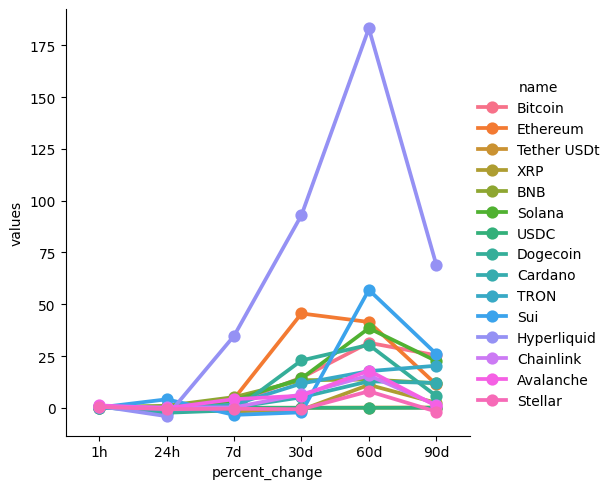

In [22]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [23]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,108901.52021,2025-05-28 19:00:00.419889
15,Bitcoin,108901.52021,2025-05-28 19:00:04.020567
30,Bitcoin,108888.80246,2025-05-28 19:01:04.302586
45,Bitcoin,108914.77611,2025-05-28 19:02:04.706177


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

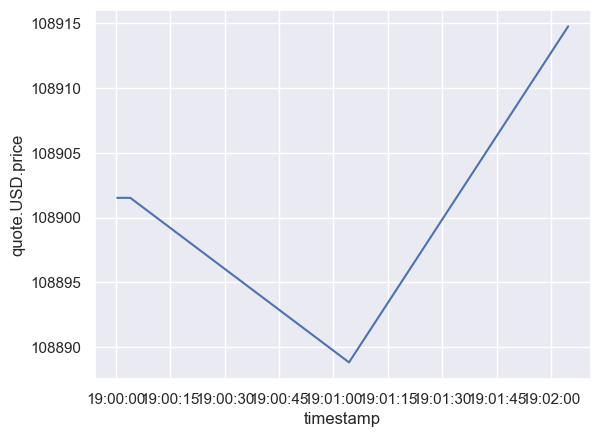

In [24]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)